# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"


In [4]:
record = 0
set = 1
city_name =[]
lat = []
lon = []
temp = []
cloud = []
humidity = []
wind_speed = []
date = []

# Print header of log
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    query_url = url + "&q=" + city.capitalize() +"&APPID=" + api_key
   
    # Request weather
    pull = requests.get(query_url).json()
    
    # Pull information from the api if city weather available in the api
    try:
        
        # Store latitude, temp, cloudiness, and wind speed in separate variables
        city_name.append(pull["name"])
        lat.append(pull["coord"]["lat"])
        lon.append(pull["coord"]["lon"])
        temp.append(pull["main"]["temp"])
        cloud.append(pull["clouds"]["all"])
        humidity.append(pull["main"]["humidity"])
        wind_speed.append(pull["wind"]["speed"])
        date.append(time.ctime(pull["dt"]))        
        
        # Keep record count, group 50 records in each set
        # Print out the record no. in each set, set number, and city name
        if record <= 50:
            print(f"Processing Record {record} of Set {set}  | {city}")
            record += 1
        else:
            record = 0
            set += 1
            print(f"Processing Record {record} of Set {set}  | {city}")
    
    # Print a message when city data is not found
    except KeyError:
        print("City not found. Skipping...")

# Print end of log
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1  | rikitea
Processing Record 1 of Set 1  | jamestown
Processing Record 2 of Set 1  | dafeng
Processing Record 3 of Set 1  | acajutla
Processing Record 4 of Set 1  | manggar
Processing Record 5 of Set 1  | yanam
Processing Record 6 of Set 1  | vila franca do campo
Processing Record 7 of Set 1  | virginia beach
Processing Record 8 of Set 1  | upernavik
Processing Record 9 of Set 1  | denpasar
Processing Record 10 of Set 1  | ribeira grande
City not found. Skipping...
Processing Record 11 of Set 1  | tazovskiy
Processing Record 12 of Set 1  | avera
Processing Record 13 of Set 1  | bredasdorp
Processing Record 14 of Set 1  | madimba
Processing Record 15 of Set 1  | ushuaia
Processing Record 16 of Set 1  | hithadhoo
Processing Record 17 of Set 1  | luchegorsk
Processing Record 18 of Set 1  | chicama
Processing Record 19 of Set 1  | senno
Processing Record 20 of Set 1  | isangel
Processing Record 21 of Set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dataframe for city weather
weather_df = np.array(city_name)
weather_df = pd.DataFrame(weather_df)
weather_df.columns = ["City"]

# Add columns of longitude, temperature, wind speed, cloudiness, humidity, and date
weather_df["Lat"] = lat
weather_df["Lon"] = lon
weather_df["Temp"] = temp
weather_df["Wind Speed"] = wind_speed
weather_df["Cloud"] = cloud
weather_df["Humidity"] = humidity
weather_df["Date"] = pd.to_datetime('today').date()

weather_df.count()


City          571
Lat           571
Lon           571
Temp          571
Wind Speed    571
Cloud         571
Humidity      571
Date          571
dtype: int64

In [6]:
# Save dataframe to csv
weather_df.to_csv("weather.csv")

# Display first 5 rows of dataframe
weather_df.head()

,City,Lat,Lon,Temp,Wind Speed,Cloud,Humidity,Date
0,Rikitea,-23.12,-134.97,294.97,5.03,100,77,2019-10-30
1,Jamestown,-33.21,138.60,288.80,6.60,0,70,2019-10-30
2,Dafeng,33.20,120.46,285.82,3.16,0,62,2019-10-30
3,Acajutla,13.59,-89.83,302.15,2.10,40,66,2019-10-30
4,Manggar,-2.88,108.27,301.13,3.94,0,74,2019-10-30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

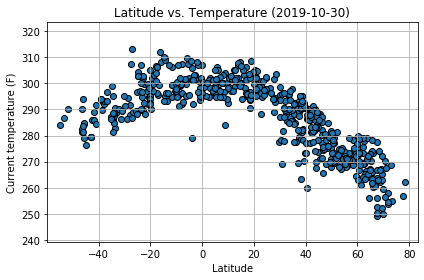

In [7]:
# Set x axis
x_axis = weather_df["Lat"]

# Plot latitude vs. temperature
plt.scatter(x_axis, weather_df["Temp"], marker="o", edgecolors="black")

# Set x and y limits
plt.xlim(min(weather_df["Lat"])-5, max(weather_df["Lat"])+5)
plt.ylim(min(weather_df["Temp"])-10, max(weather_df["Temp"])+10)

# Set a Title and labels
plt.title("Latitude vs. Temperature ({})".format(weather_df["Date"][0]))
plt.xlabel("Latitude")
plt.ylabel("Current temperature (F)")

# Add grids to plot
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/temp.png")
plt.show()

#### Latitude vs. Humidity Plot

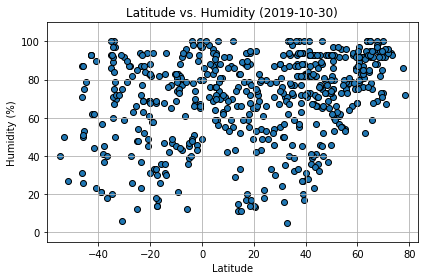

In [8]:
plt.scatter(x_axis, weather_df["Humidity"], marker="o", edgecolors="black")

# Set x and y limits
plt.xlim(min(weather_df["Lat"])-5, max(weather_df["Lat"])+5)
plt.ylim(min(weather_df["Humidity"]) - 10, max(weather_df["Humidity"])+10)

# Set a Title and labels
plt.title("Latitude vs. Humidity ({})".format(weather_df["Date"][0]))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grids to plot
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

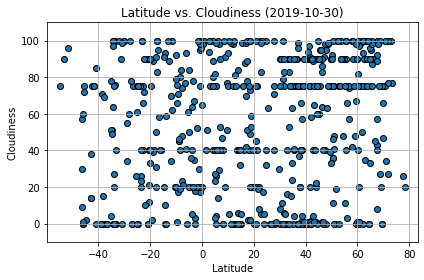

In [9]:
# Scatter plot latitude vs. cloudiness
plt.scatter(x_axis, weather_df["Cloud"], marker="o", edgecolors="black")

# Set x and y limits
plt.xlim(min(weather_df["Lat"])-5, max(weather_df["Lat"]+5))
plt.ylim(min(weather_df["Cloud"])-10, max(weather_df["Cloud"])+10)

# Set a Title and labels
plt.title("Latitude vs. Cloudiness ({})".format(weather_df["Date"][0]))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Add grids to plot
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

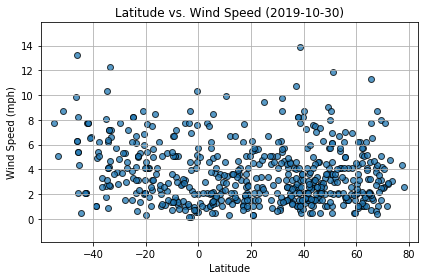

In [10]:
# Scatter plot latitude vs. wind speed
plt.scatter(x_axis, weather_df["Wind Speed"], marker="o", edgecolors="black", alpha = 0.75)

# Set x and y limits
plt.xlim(min(weather_df["Lat"])-5, max(weather_df["Lat"]+5))
plt.ylim(min(weather_df["Wind Speed"])-2, max(weather_df["Wind Speed"])+2)

# Set a Title and labels
plt.title("Latitude vs. Wind Speed ({})".format(weather_df["Date"][0]))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grids to plot
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/wind.png")
plt.show()